<a href="https://colab.research.google.com/github/Handrum/ML_Equipo_6/blob/main/A3a_DL_TC5033_embeddings_hw1_Equipo_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>
![Evidence 3](https://i.imgur.com/mu6ZuGT.jpg)

# **Master's in Applied Artificial Intelligence**
## **Course: Advanced Machine Learning Methods**
* ### **Lead Instructor**: José Antonio Cantoral Ceballos
* **Tutor**: Ana Bricia Galindo

## **Activity A3A: Exploring Word Embeddings with GloVe and Numpy**

*   --> Rafael Alexis Pinto Flórez | A01794500
*   --> Julio Baltazar Colín | A01794476
*   --> José Santiago Rueda Antonio | A01794118
*   --> Helmy Andrea Moreno Navarro | A01793918

## TC 5033
### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



# **Import libraries**

**Descripción de las librerías:**


1. **torch**: Esta es una librería muy popular en el campo del aprendizaje profundo (deep learning). Se utiliza para crear y entrenar modelos de redes neuronales. Puedes pensar en ella como una herramienta que te permite construir y trabajar con redes neuronales de manera eficiente.

2. **torch.nn.functional as F**: Esta es una parte de la librería torch que proporciona funciones y operaciones útiles para el procesamiento de datos en modelos de redes neuronales. Es comúnmente utilizada para definir las funciones de activación y realizar operaciones en tensores.

3. **Sklearn.manifold import TSNE**: La librería scikit-learn es muy útil para el aprendizaje automático. La parte manifold ofrece una técnica llamada t-Distributed Stochastic Neighbor Embedding (TSNE), que se utiliza para visualizar datos en un espacio de dimensiones reducidas de manera efectiva. Esto es útil para comprender y representar datos de alta dimensionalidad.

4. **Sklearn.decomposition import PCA**: Otra parte de scikit-learn que proporciona el análisis de componentes principales (PCA), que es una técnica de reducción de dimensionalidad. Ayuda a encontrar las características más importantes en los datos, reduciendo su complejidad.

5. **matplotlib.pyplot as plt**: Esta librería se utiliza para crear visualizaciones gráficas. En este caso, la parte pyplot de matplotlib se importa como plt y se utiliza para generar gráficos y figuras.

6. **numpy as np**: numpy es una librería fundamental para la computación científica en Python. Proporciona arreglos y operaciones numéricas eficientes. Aquí, se importa como np para simplificar su uso.

7. **numpy.linalg.norm**: Esto se refiere a una función específica en numpy que calcula la norma (longitud) de un vector o matriz. Es útil para calcular la magnitud de un vector.

8. **pickle**: pickle es una librería que permite serializar y deserializar objetos en Python. Se utiliza para guardar y cargar objetos en archivos.

9. **requests**: Esta librería se utiliza para realizar solicitudes HTTP en Python. Es útil para interactuar con recursos en la web, como descargar datos desde una URL.

10. **io.StringIO, io.BytesIO, io.TextIOWrapper**: Estas son clases en el módulo io que se utilizan para manipular datos en memoria, como cadenas de texto y bytes. Son útiles cuando necesitas trabajar con datos en memoria en lugar de archivos físicos.

11. **zipfile.ZipFile**: Esta clase se utiliza para trabajar con archivos comprimidos en formato ZIP. Puedes usarla para extraer o crear archivos ZIP.

12. **plt.style.use('ggplot')**: Esta línea de código configura el estilo de las gráficas generadas con matplotlib.pyplot para que sigan un estilo de diseño llamado 'ggplot', que es un estilo popular en la visualización de datos.

In [ ]:
# Import libraries
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
import requests
from io import StringIO, BytesIO, TextIOWrapper
from zipfile import ZipFile

plt.style.use('ggplot')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Load file**

En este código, se están configurando dos cosas:

- **PATH** es como una dirección de internet que apunta a un archivo especial que contiene información sobre palabras en un formato que las computadoras pueden entender. Ese archivo se llama 'glove.6B.50d.txt' y está guardado en una carpeta específica en Google Drive. Este archivo es útil para trabajar con palabras en proyectos de aprendizaje automático y procesamiento de lenguaje natural.

- **emb_dim** es un número que se usa para decir cuántas características o aspectos diferentes se utilizan para describir cada palabra en ese archivo especial. En este caso, se eligieron 50 características, lo que significa que cada palabra se representa usando 50 números. Esto es útil para que las computadoras comprendan y trabajen con palabras de una manera más avanzada.

In [ ]:
PATH = '/content/drive/MyDrive/MNA/Advanced Machine Learning Methods/Semana 5/glove.6B.50d.txt'
emb_dim = 50

**Function load_embeddings**

-The following code is a function that takes as input the path to a text file containing vector representations of words. It then reads that file, line by line, and extracts the words and their associated vectors. This data is stored in a dictionary where the words are the keys and the vectors are the values.

Finally, the function returns that dictionary, allowing access to the vector representations of words in a convenient format for use in natural language processing tasks, such as language translation or text analysis.

In [ ]:
#load the embedings from file
def load_embeddings(path):
    embeddings = {}
    #read all lines and split the values
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            embedding = np.array(values[1:], dtype='float32')
            embeddings[word] = embedding
    return embeddings

**Function create_embedding_matrix**

This is a Python function used in **natural language processing** (NLP) tasks. Its job is to create a sort of "table" containing numerical information about the words in a language.

With the number of words and for each word, you have a number that represents how it relates to other meanings or words. This number is a vector of numbers that is called an "embedding vector". The idea is to take all the words in a vocabulary and create a matrix (like a spreadsheet) that stores these embedding vectors.

The function takes three features as input:

- A dictionary that associates words with their embedding vectors. Each word has a large number of values that form its vector.

- A dictionary that associates words with smaller numbers that represent their position in the vocabulary. This is used to organize the vectors in the matrix.

- A number representing how many values each vector has (the "dimension" of the embedding vector).

The function creates an array full of zeros with a size that depends on the number of words in the vocabulary and the dimension of the vectors. It then looks at each word in the vocabulary and, if there is an embedding vector available for that word, places it in the array in the correct position.

The result is an array containing all the embedding vectors for all the words in the vocabulary. This matrix can be used in machine learning models to help understand and process natural language. Words that do not have an embedding vector in the dictionary are represented as rows of zeros in the matrix.



In [ ]:
#create a matrix with the vectors and dictionary
def create_embedding_matrix(embeddings, word_to_index, emb_dim):
    num_words = len(word_to_index)
    embedding_matrix = np.zeros((num_words, emb_dim))

    for word, index in word_to_index.items():
        embedding = embeddings.get(word)
        if embedding is not None:
            embedding_matrix[index] = embedding
    return embedding_matrix

**Create dictionary with embeddings**

>With a considerable number of words, you have a kind of "special number" that helps computers understand what that word means. These "special numbers" are called embedding vectors.

>This function helps us to organize and use these "special numbers" (embedding vectors) to understand and work with words in natural language processing applications.

>This function explains how words are transformed into numbers so that computers can understand them better. This is done by taking a dictionary that relates words to special numbers. Then, a list of all the words in that dictionary is created. In addition, two lists are generated to relate words to numbers and vice versa, which makes searching easier. Then, a special function is used to create a table containing these special numbers for each word.

In the end, you get three things: a list that **connects words to numbers**, another that** links numbers to words**, and a special **table with the numbers** that represent the meaning of the words. These tools are useful for computers to process and understand natural language.


In [ ]:
# Create dictionary with embeddings
def create_emb_dictionary(embeddings, emb_dim):
    words = list(embeddings.keys())
    word_to_index = {word: index for index, word in enumerate(words)}
    index_to_word = {index: word for word, index in word_to_index.items()}
    embedding_matrix = create_embedding_matrix(embeddings,word_to_index,emb_dim)

    return word_to_index, index_to_word, embedding_matrix


##**Create dictionary**

>This function explains how words are transformed into numbers so that computers can understand them better. This is done by taking a dictionary that relates words to special numbers. Then, a list of all the words in that dictionary is created. In addition, two lists are generated to relate words to numbers and vice versa, which makes searching easier. Then, a special function is used to create a table containing these special numbers for each word.

In the end, you get three things:
- a list that connects words to numbers,
- another that links numbers to words,
- and a special table with the numbers that represent the meaning of the words.

These tools are useful for computers to process and understand natural language.

In [ ]:
# create dictionary
embedings = load_embeddings(PATH)
embeddings_dict = create_emb_dictionary(embedings, emb_dim)

In [ ]:
#Output
embeddings_dict

({'the': 0,
  ',': 1,
  '.': 2,
  'of': 3,
  'to': 4,
  'and': 5,
  'in': 6,
  'a': 7,
  '"': 8,
  "'s": 9,
  'for': 10,
  '-': 11,
  'that': 12,
  'on': 13,
  'is': 14,
  'was': 15,
  'said': 16,
  'with': 17,
  'he': 18,
  'as': 19,
  'it': 20,
  'by': 21,
  'at': 22,
  '(': 23,
  ')': 24,
  'from': 25,
  'his': 26,
  "''": 27,
  '``': 28,
  'an': 29,
  'be': 30,
  'has': 31,
  'are': 32,
  'have': 33,
  'but': 34,
  'were': 35,
  'not': 36,
  'this': 37,
  'who': 38,
  'they': 39,
  'had': 40,
  'i': 41,
  'which': 42,
  'will': 43,
  'their': 44,
  ':': 45,
  'or': 46,
  'its': 47,
  'one': 48,
  'after': 49,
  'new': 50,
  'been': 51,
  'also': 52,
  'we': 53,
  'would': 54,
  'two': 55,
  'more': 56,
  "'": 57,
  'first': 58,
  'about': 59,
  'up': 60,
  'when': 61,
  'year': 62,
  'there': 63,
  'all': 64,
  '--': 65,
  'out': 66,
  'she': 67,
  'other': 68,
  'people': 69,
  "n't": 70,
  'her': 71,
  'percent': 72,
  'than': 73,
  'over': 74,
  'into': 75,
  'last': 76,
  'some

In [ ]:
#List or dictionary storing embeddings
embeddings_dict[1][691]

'king'

In [ ]:
#Search for the keyword 'queen' in the dictionary index 0
embeddings_dict[0]['queen']

2060

## **Value whith embedding_dict[2]**

>The next result, what we will see is a kind of list of numbers, as if it were a spreadsheet with many rows. Each row in this list represents something like a word or an idea. The numbers in each row are like special labels that describe that word or idea..

It can be interpreted as follows:

- Each row in the matrix is a distinct vector.
- Each number in a vector is a characteristic or dimension of the vector space that encodes some semantic property or relationship of the word or entity it represents.
- The length and specific content of these vectors depend on how they have been generated.

For example, in the result provided, the first number **0.41800001** might represent a certain feature of the associated entity (e.g., a word), and subsequent numbers will represent other features. In total, there will be N features or dimensions in this vector space.

In [ ]:
#The value with embeddings_dict[2] of the embeddings_dict dictionary.
embeddings_dict[2]

array([[ 0.41800001,  0.24968   , -0.41242   , ..., -0.18411   ,
        -0.11514   , -0.78580999],
       [ 0.013441  ,  0.23682   , -0.16899   , ..., -0.56656998,
         0.044691  ,  0.30392   ],
       [ 0.15164   ,  0.30177   , -0.16763   , ..., -0.35652   ,
         0.016413  ,  0.10216   ],
       ...,
       [-0.51181   ,  0.058706  ,  1.09130001, ..., -0.25003001,
        -1.125     ,  1.58630002],
       [-0.75897998, -0.47426   ,  0.47369999, ...,  0.78953999,
        -0.014116  ,  0.64480001],
       [ 0.072617  , -0.51393002,  0.47279999, ..., -0.18907   ,
        -0.59021002,  0.55558997]])

The following code is used to **save** a dictionary named embeddings_dict to a binary file named '**embeddings_dict_50D.pkl**' using the pickle module.

The **resulting** file will contain a serialized representation of the data stored in **embeddings_dict**, allowing it to be retrieved in the future.

In [ ]:
# Serialize
#Python operation for binary write to a file named 'embeddings_dict_50D.pkl'.
with open('embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

# Deserialize
# with open('embeddings_dict_200D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

## **See some embeddings**

This code reads and counts words. You give it two things: the location of the text file and how many words you want it to count.

As follows:
- Open the text file and start reading it.
- Look at each line, one by one.
- It divides each line into words and shows how many words are in each line.
- It also shows how many words there are after the first word.
- It continues to do this in a for loop until it has counted the number of words it delivered (or more), and then stops.

In [ ]:
# Show some
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

In [ ]:
#Result of the first lines by 50 words.
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

## **Function "Plot_embeddings"**

It is used to visualize word embeddings in a two-dimensional space using dimensionality reduction techniques, such as **Principal Component Analysis** (PCA) or **t-Distributed Stochastic Neighbor Embedding** (t-SNE).

For the **plot_embeddings** function and to know the words that are grouped according to their semantic similarity in a two-dimensional space, let's see the following:

- Select a set of words to display.
- Extract the corresponding word embeddings.
- Apply PCA or t-SNE to reduce the dimensionality to 2 dimensions.
- Display the words in a 2D scatter plot.
- Label each point with its word.
- Display the resulting plot.

In [ ]:
#Python function named plot_embeddings
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func=PCA):

    #create de dictionary
    word_to_index, index_to_word, embedding_matrix = embeddings_dict

    # Create a list of indices of the words to be shown
    indices_to_show = [word_to_index[word] for word in words2show]

    # Select only the embeddings of the words to be shown
    selected_embeddings = embedding_matrix[indices_to_show]

    # Apply the dimensionality reduction function
    if func == PCA:
        reducer = PCA(n_components=2)
    elif func == TSNE:
        reducer = TSNE(n_components=2, perplexity=30, n_iter=1000)
    else:
        raise ValueError("Func debe ser PCA o TSNE")

    embeddings_2d = reducer.fit_transform(selected_embeddings)

    # Visualize the results
    plt.figure(figsize=(13, 8))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1],alpha=0.7, c='teal', s=30)

    # Annotate the words
    for i, word in enumerate(words2show):
        plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

    plt.title(f'{func.__name__} Visualization of Word Embeddings')
    plt.show()


In [ ]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


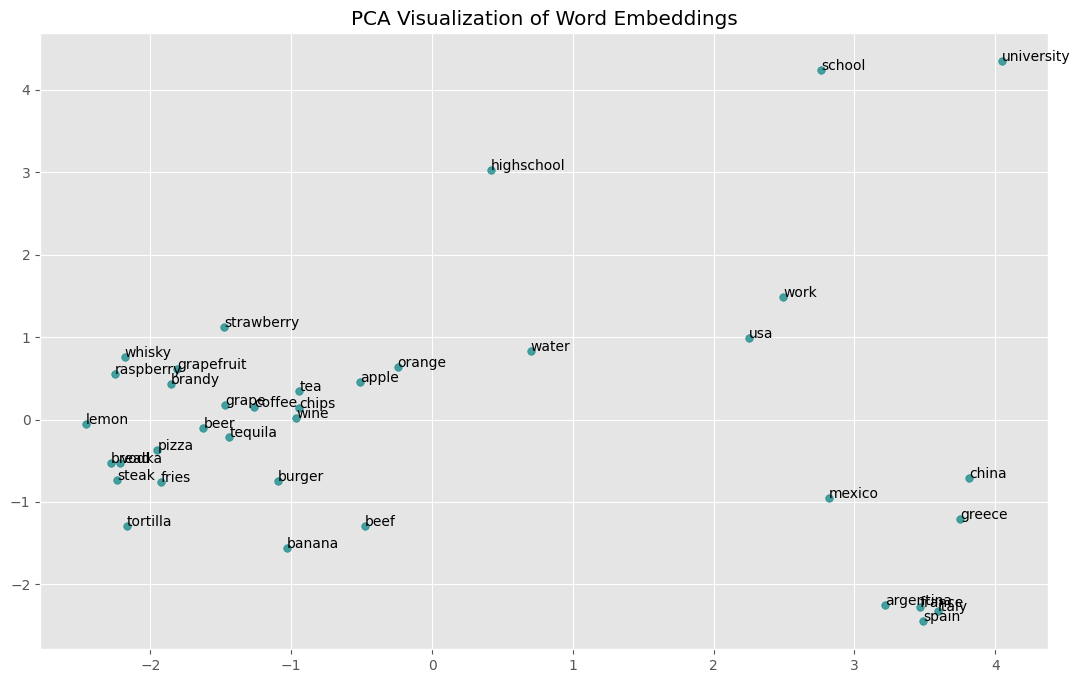

In [ ]:
# PCA dimensionality reduction for visualization
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

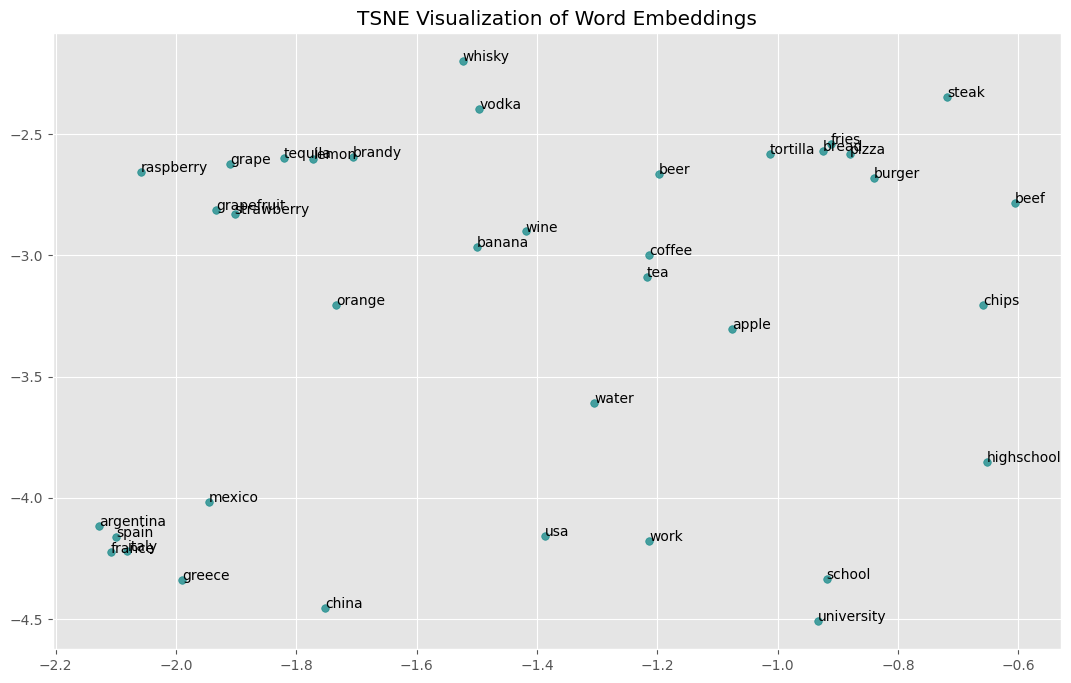

In [ ]:
# t-SNE dimensionality reduction for visualization
plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)

# **Let us compute analogies with Function "analogy"**

In the following code we will define a function called "analogy" that we will use to find a word that is analogous to a set of three input words in a word vector space. As follows:

>The analogy function takes three input words and a set of word vectors, and searches for a fourth word that is analogous to the **relationship between the first three words in that vector space**. To do this, it computes an **"analogy "** vector and then measures the cosine: (x . y) / (||x|| * ||y||), where x is the analogy vector and y is the embedding vector of a given word. This is done for all words in word_to_index except the original words (word1, word2 and word3) similarity between this vector and all other word vectors in the set. The word with the **highest similarity** is returned as the result, which represents the word analogous to the relationship between the original three words.

In [ ]:
def analogy(word1, word2, word3, embeddings_dict):

    word_to_index, index_to_word, embedding_matrix = embeddings_dict

    # Check if the words are in the embeddings dictionary
    if word1 not in word_to_index or word2 not in word_to_index or word3 not in word_to_index:
        raise ValueError("One or more words are not in the embeddings dictionary")

    vector_word1 = embedding_matrix[ word_to_index[word1]]
    vector_word2 = embedding_matrix[ word_to_index[word2]]
    vector_word3 = embedding_matrix[ word_to_index[word3]]

    # Calculate the analogy vector
    analogy_vector = vector_word2 - vector_word1 + vector_word3

    # Calculate similarities between the analogy vector and all embeddings vectors (x, y) = x . y / ||x||
    similarities = {word: np.dot(analogy_vector,  embedding_matrix[ word_to_index[word]]) #get de dot product of each word
                     /  (np.linalg.norm(analogy_vector) #calculate the norm of the vector
                    * np.linalg.norm( embedding_matrix[ word_to_index[word]])) #calculate the norm of the vector
                     for word in word_to_index #skip the origin words
                      if word != word1 and word != word2 and word != word3
                   }

    # Find the word with the highest similarity
    most_similar_word = max(similarities, key=similarities.get)

    return most_similar_word

## **Example:**

Using the words **'man', 'king' and 'woman'* as input to the **analogy** function along with the set of **word vectors** called embeddings_dict. The analogy function searches for a fourth word that is analogous to **the relationship** between 'man' and 'king' in the **context of 'woman'**. Then, the result is stored in the variable analogous_word.

Finally, a statement showing the calculated analogy is printed:

- "man is to king as woman is to analogous_word".

The analogy function looks for a word that completes the analogy in the same context in which 'king' is related to 'man' as 'woman' is related to 'analogous_word'.

In [ ]:
word1 = 'man'
word2 = 'king'
word3 = 'woman'

analogous_word = analogy(word1, word2, word3,embeddings_dict)
print(f"{word1} is to {word2} as {word3} is to {analogous_word}")

man is to king as woman is to queen


In [ ]:
word1 = 'school'
word2 = 'student'
word3 = 'jail'

analogous_word = analogy(word1, word2, word3,embeddings_dict)
print(f"{word1} is to {word2} as {word3} is to {analogous_word}")

school is to student as jail is to jailed


# **find_most_similar**

This function allows you to find words **most similar** to a reference word based on their embedding vectors using **scalar product similarity and normalization**.

It was performed as follows according to 3 arguments:

**The reference word**, a set of information about words and their mathematical representations (like a dictionary), and the maximum number of words to be found.

The **information** about words and **their representations** is divided into **three parts**:

- One that assigns a unique number to each word (word_to_index),
- Another that associates numbers with words (index_to_word),
- And a matrix containing the mathematical representations of all the words (embedding_matrix).

The function will check if the reference word is found in the information that was delivered. If it is not found, it will display **an error** indicating that one or more words **are not in the data**.

If the reference word exists in the data, we will obtain its **mathematical representation**.

Then, **we will **calculate how similar** the reference word is to all other words in the data. This is done by a mathematical operation that compares the words to each other and adjusts the results **so that they are comparable**.

The similarities will be stored in a place called **"similarities "**, where each word will have a **number representing how similar it is** to the reference word.

The words will be sorted from most similar to least similar.

And finally, in the function **select the 10 most similar words** and the result will be displayed.

In [ ]:
# most similar
def find_most_similar(word, embeddings_dict, top_n=10):

  word_to_index, index_to_word, embedding_matrix = embeddings_dict

  # Check if the words are in the embeddings dictionary
  if word1 not in word_to_index or word2 not in word_to_index or word3 not in word_to_index:
      raise ValueError("One or more words are not in the embeddings dictionary")

  vector_word = embedding_matrix[ word_to_index[word]]

  # Calculate similarities between the analogy vector and all embeddings vectors (x, y) = x . y / ||x||
  similarities = {other_word: np.dot(vector_word, embedding_matrix[ word_to_index[other_word]]) #get de dot product of each word
                    / (np.linalg.norm(vector_word) #calculate the norm of the vector
                    * np.linalg.norm(embedding_matrix[ word_to_index[other_word]])) #calculate the norm of the vector
                    for other_word in word_to_index if other_word != word}

  #sort the words obtained and return
  sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

  # Find the top n  words with the highest similarity
  most_similar_words = [word for word, similarity in sorted_similarities[:top_n]]

  return most_similar_words


In [ ]:
#For example, the most similar word to Mexico
most_similar = find_most_similar('mexico', embeddings_dict)

In [ ]:
#Results expected: countries
most_similar

['mexican',
 'venezuela',
 'colombia',
 'peru',
 'chile',
 'puerto',
 'rico',
 'cuba',
 'guatemala',
 'panama']

In [ ]:
#With the following code, we will use it to present in a readable way the similar words along with their position in the list of most similar words.
#In this case, the first letter of the list of countries named above
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> m
2 ---> v
3 ---> c
4 ---> p
5 ---> c
6 ---> p
7 ---> r
8 ---> c
9 ---> g
10 ---> p


# **Note**

For this code, the variable most_similar as response will get a list of words that are the most similar to 'beef' in the embeddings dataset.

We will also be able to select these based on their similarity to 'beef' and they can be used in various applications, such as synonym search or text analysis tasks.

In [ ]:
#Similar to "beef"
most_similar = find_most_similar('beef', embeddings_dict)

In [ ]:
#Result word most similar to "beef"
most_similar

['meat',
 'pork',
 'chicken',
 'poultry',
 'meats',
 'veal',
 'imports',
 'dairy',
 'seafood',
 'roasted']

# **Conclusions**:

1. **Loading GloVe Embeddings:**
   - We have created a function `load_embeddings` that loads embeddings from a file `glove.6B.50d.txt` and stores them in a dictionary where keys are words and values are the corresponding embedding vectors. We added a function to create a matrix for the data to allow managing and querying the data.

2. **Analogies Function:**
   - We implemented the `analogies(word1, word2, word3, embeddings_dict)` function that performs word analogies. Given an analogy "word1 is to word2 as word3 is to ____", this function finds the word that completes the analogy. The function uses the "Cosine similarity of vectors" to find the related analog word.

3. **Finding Similar Words Function:**
   - We created the `most_similar_words(word, embeddings_dict, n=10)` function that finds the n most similar words to a given word in terms of cosine similarity.

4. **Embeddings Visualization:**
   - We implemented a `plot_embeddings` function that allows for the visualization of embeddings in a two-dimensional space using techniques like PCA and t-SNE. This function facilitates the graphical representation of relationships between words in the embedding space.

5. **Efficient Application in Terms of Information Demand:**
 - The application does not necessitate the use of large vector representations, as it achieves satisfactory accuracy with a 50-dimensional sample. This efficiency significantly diminishes the model training duration.

6. **Word embeddings**

 Help computational processes understand the meaning of words. This allows machines to see how words relate to each other and saves time by making text reading and comprehension tasks easier. It is important to understand, too, how these computational processes help machines understand **what is the correct meaning of a word** when it may have different meanings in different contexts. In NLP they are widely used to learn how to make computers understand human language better. It is worth mentioning what the teacher said in class.... **"see what context you have and I will tell you what word you are "**.
